In [1]:
import pandas as pd

# קריאה של הדאטה
df = pd.read_csv("03_Clustering_Marketing.csv")  # שנה את הנתיב לפי המיקום שלך

# הצצה ראשונית על הנתונים
print(df.head())
print(df.info())


   gradyear gender     age  NumberOffriends  basketball  football  soccer  \
0      2007    NaN     NaN                0           0         0       0   
1      2007      F   17.41               49           0         0       1   
2      2007      F  17.511               41           0         0       0   
3      2006      F     NaN               36           0         0       0   
4      2008      F  16.657                1           0         0       0   

   softball  volleyball  swimming  ...  blonde  mall  shopping  clothes  \
0         0           0         0  ...       0     0         0        0   
1         0           0         1  ...       0     0         0        0   
2         0           0         0  ...       0     1         0        0   
3         0           0         0  ...       0     0         0        0   
4         0           0         1  ...       0     0         0        3   

   hollister  abercrombie  die  death  drunk  drugs  
0          0            0    0  

In [2]:
# בדיקה כמה ערכים חסרים בכל עמודה
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
gradyear              0
gender             1337
age                2496
NumberOffriends       0
basketball            0
football              0
soccer                0
softball              0
volleyball            0
swimming              0
cheerleading          0
baseball              0
tennis                0
sports                0
cute                  0
sex                   0
sexy                  0
hot                   0
kissed                0
dance                 0
band                  0
marching              0
music                 0
rock                  0
god                   0
church                0
jesus                 0
bible                 0
hair                  0
dress                 0
blonde                0
mall                  0
shopping              0
clothes               0
hollister             0
abercrombie           0
die                   0
death                 0
drunk                 0
drugs                 0
dtype: int64

In [3]:
# כמה שורות נשארות אחרי שמורידים רשומות עם ערכים חסרים
df_clean = df.dropna()
print(f"\nTotal rows before cleaning: {len(df)}")
print(f"Total rows after cleaning: {len(df_clean)}")



Total rows before cleaning: 15000
Total rows after cleaning: 12042


In [4]:

# פילוח לפי מין
print("\nRows per gender after cleaning:")
print(df_clean['gender'].value_counts())



Rows per gender after cleaning:
gender
F    9710
M    2332
Name: count, dtype: int64


In [5]:

# פילוח לפי שנת סיום לימודים
print("\nRows per graduation year after cleaning:")
print(df_clean['gradyear'].value_counts())



Rows per graduation year after cleaning:
gradyear
2006    3089
2008    3022
2007    3002
2009    2929
Name: count, dtype: int64


In [ ]:
df_clean['age']  # לחשוב איך מעגלים את הגילאים שיהיו הגיוניים ולא הדבר המוזר הזה
                 # אלא אם כן זה חשוב שהערכים יהיו רציפים

1         17.41
2        17.511
4        16.657
5        18.034
6         18.53
          ...  
14995    16.329
14996    16.545
14997    17.999
14998    17.903
14999    15.811
Name: age, Length: 12042, dtype: object

In [ ]:

# פילוח לפי גיל
print("\nRows per age after cleaning:")
print(df_clean['age'].value_counts())



Rows per age after cleaning:


age
16. Jun    24
16.591     20
17.399     20
17.443     19
17.311     19
           ..
96.474      1
23.014      1
73.221      1
20.244      1
19.975      1
Name: count, Length: 1887, dtype: int64

C:\Users\amits\AppData\Local\Temp\ipykernel_29008\848041399.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['age_cleaned'] = df_clean['age'].apply(clean_age)


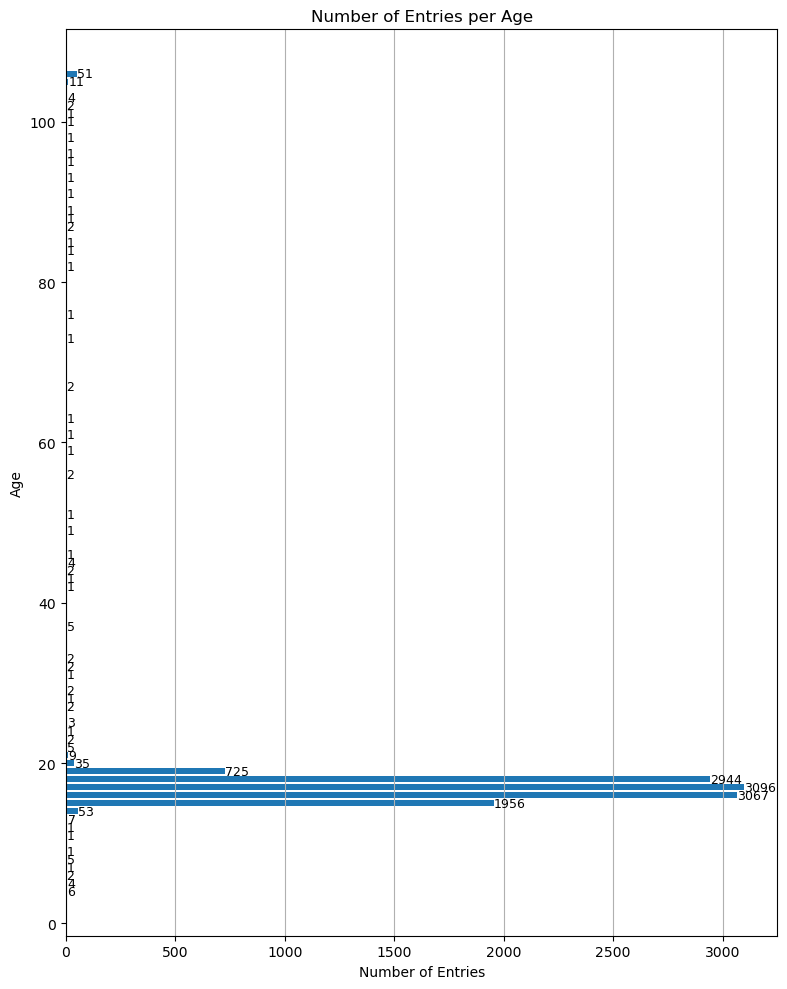

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Cleaning function
def clean_age(age):
    if pd.isnull(age):
        return None
    if isinstance(age, str):
        match = re.match(r'^(\d+)', age)
        if match:
            return int(match.group(1))
        return None
    try:
        return int(float(age))
    except:
        return None

# Apply the cleaning
df_clean['age_cleaned'] = df_clean['age'].apply(clean_age)
df_age = df_clean.dropna(subset=['age_cleaned'])

# Count and sort
age_counts = df_age['age_cleaned'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 10))
bars = plt.barh(age_counts.index, age_counts.values)

# Labels at end of bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2,
             str(int(width)), va='center', fontsize=9)

plt.ylabel("Age")
plt.xlabel("Number of Entries")
plt.title("Number of Entries per Age")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [10]:

# פילוח לפי מספר חברים (נחלק לקבוצות)
df_clean['friends_group'] = pd.cut(df_clean['NumberOffriends'], bins=[-1, 50, 100, 200, 500, 1000, float('inf')],
                                   labels=['0-50', '51-100', '101-200', '201-500', '501-1000', '1000+'])
print("\nRows per friends group after cleaning:")
print(df_clean['friends_group'].value_counts())



Rows per friends group after cleaning:
friends_group
0-50        9588
51-100      1950
101-200      450
201-500       52
501-1000       2
1000+          0
Name: count, dtype: int64


C:\Users\amits\AppData\Local\Temp\ipykernel_29392\164684690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['friends_group'] = pd.cut(df_clean['NumberOffriends'], bins=[-1, 50, 100, 200, 500, 1000, float('inf')],


In [11]:

# פילוח לפי שילובים: למשל גיל ומין
print("\nRows per gender and age after cleaning:")
print(df_clean.groupby(['gender', 'age']).size())



Rows per gender and age after cleaning:
gender  age    
F       100.865    1
        102.784    1
        103.307    1
        103.595    1
        103.915    1
                  ..
M       45.331     1
        45.771     1
        5.207      1
        6.198      1
        6.234      1
Length: 3048, dtype: int64


In [22]:
# ננקה את עמודת הגיל
df_clean['age'] = pd.to_numeric(df_clean['age'], errors='coerce')

# עכשיו נסנן לפי גיל סביר (למשל 13 עד 30)
df_clean2 = df_clean[(df_clean['age'] >= 13) & (df_clean['age'] <= 30)]

print(f"\nTotal rows after filtering by reasonable ages: {len(df_clean2)}")


Total rows after filtering by reasonable ages: 11639


C:\Users\amits\AppData\Local\Temp\ipykernel_29392\20331548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['age'] = pd.to_numeric(df_clean['age'], errors='coerce')


In [23]:

# או מין ושנתון
print("\nRows per gender and graduation year after cleaning:")
print(df_clean2.groupby(['gender', 'gradyear']).size())


Rows per gender and graduation year after cleaning:
gender  gradyear
F       2006        2331
        2007        2315
        2008        2392
        2009        2347
M       2006         687
        2007         588
        2008         520
        2009         459
dtype: int64


רעיונות לניתוח הדאטה
Clustering:

שימוש ב-KMeans או Agglomerative Clustering כדי לקבץ את התלמידים לפי תחומי עניין (למשל ספורט/מוזיקה/דת/קניות וכו').

לפני כן כדאי לבצע scale לכל העמודות.

ניתוח מגדרי:

האם בנים ובנות מציינים תחומים שונים? (למשל, בנות מדברות יותר על shopping ו-cheerleading, בנים על football ו-rock).

הבדלים לפי גיל:

האם גילאים שונים מציינים תחומים שונים?
(למשל צעירים יותר מדברים יותר על ספורט, מבוגרים יותר על מוזיקה).

ניתוח לפי מספר חברים:

האם יש קשר בין מספר חברים לבין תחומי עניין?

אולי אלו עם הרבה חברים מדברים יותר על דברים פופולריים כמו ספורט או קניות?

פילוח לפי דת/אמונה:

לראות מי מדבר על נושאים כמו god, jesus, bible.

האם יש קשר בין אזכורים של נושאי דת לבין תחומים אחרים (למשל פחות אזכורים של drunk/drugs?).

זיהוי קבוצות קצה:

תלמידים שמזכירים הרבה מילים שליליות (death, die, drugs) — זיהוי "קבוצות בסיכון".

שימוש ב-PCA:

לבצע ניתוח PCA כדי להוריד מימדים ולחפש דפוסים מעניינים (להבין אילו תכונות תורמות הכי הרבה להבדלים בין תלמידים).

בנית מודל לניבוי מין/גיל:

לקחת את האזכורים בפרופיל כ-features ולנסות לחזות מגדר או גיל בעזרת מודל סיווג פשוט.

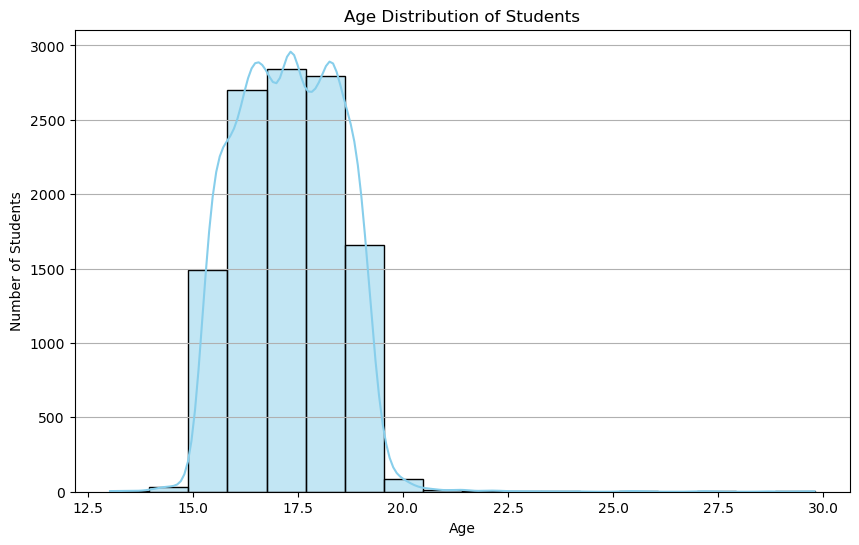

In [36]:
# התפלגות גילאים

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df_clean2['age'], bins=18, kde=True, color='skyblue')
plt.title('Age Distribution of Students')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.grid(axis='y')
plt.show()



C:\Users\amits\AppData\Local\Temp\ipykernel_29392\1679038215.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df_clean, palette='pastel')


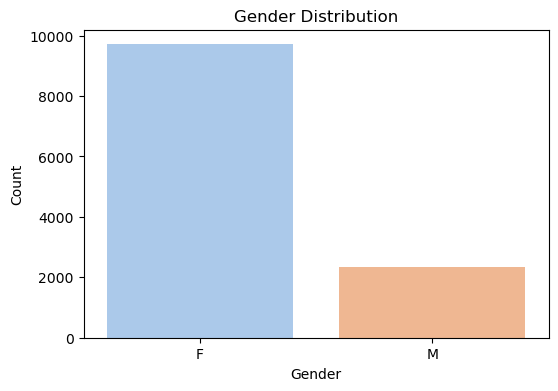

In [27]:
# התפלגות מגדר
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df_clean, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


C:\Users\amits\AppData\Local\Temp\ipykernel_29392\2172100364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gradyear', data=df_clean, palette='muted')


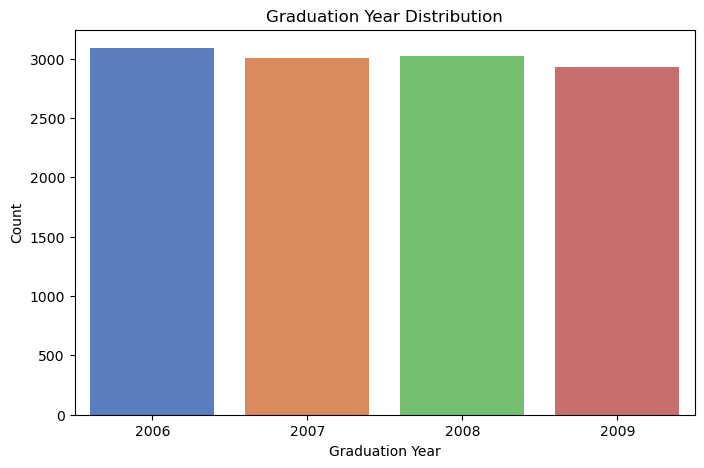

In [28]:
# התפלגות שנת סיום לימודים (GradYear)

plt.figure(figsize=(8,5))
sns.countplot(x='gradyear', data=df_clean, palette='muted')
plt.title('Graduation Year Distribution')
plt.xlabel('Graduation Year')
plt.ylabel('Count')
plt.show()


C:\Users\amits\AppData\Local\Temp\ipykernel_29392\1168548635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['friends_group'] = pd.cut(df_clean['NumberOffriends'], bins=[-1, 50, 100, 200, 500, 1000, float('inf')],
C:\Users\amits\AppData\Local\Temp\ipykernel_29392\1168548635.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='friends_group', data=df_clean, palette='viridis')


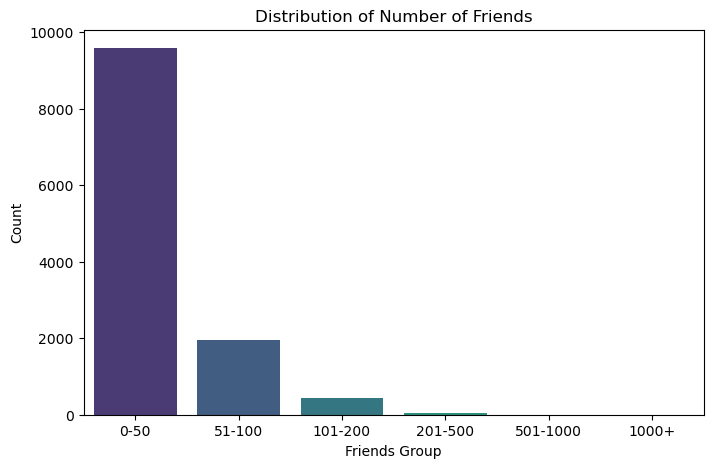

In [29]:
# חברים בקבוצות גודל

df_clean['friends_group'] = pd.cut(df_clean['NumberOffriends'], bins=[-1, 50, 100, 200, 500, 1000, float('inf')],
                                   labels=['0-50', '51-100', '101-200', '201-500', '501-1000', '1000+'])

plt.figure(figsize=(8,5))
sns.countplot(x='friends_group', data=df_clean, palette='viridis')
plt.title('Distribution of Number of Friends')
plt.xlabel('Friends Group')
plt.ylabel('Count')
plt.show()


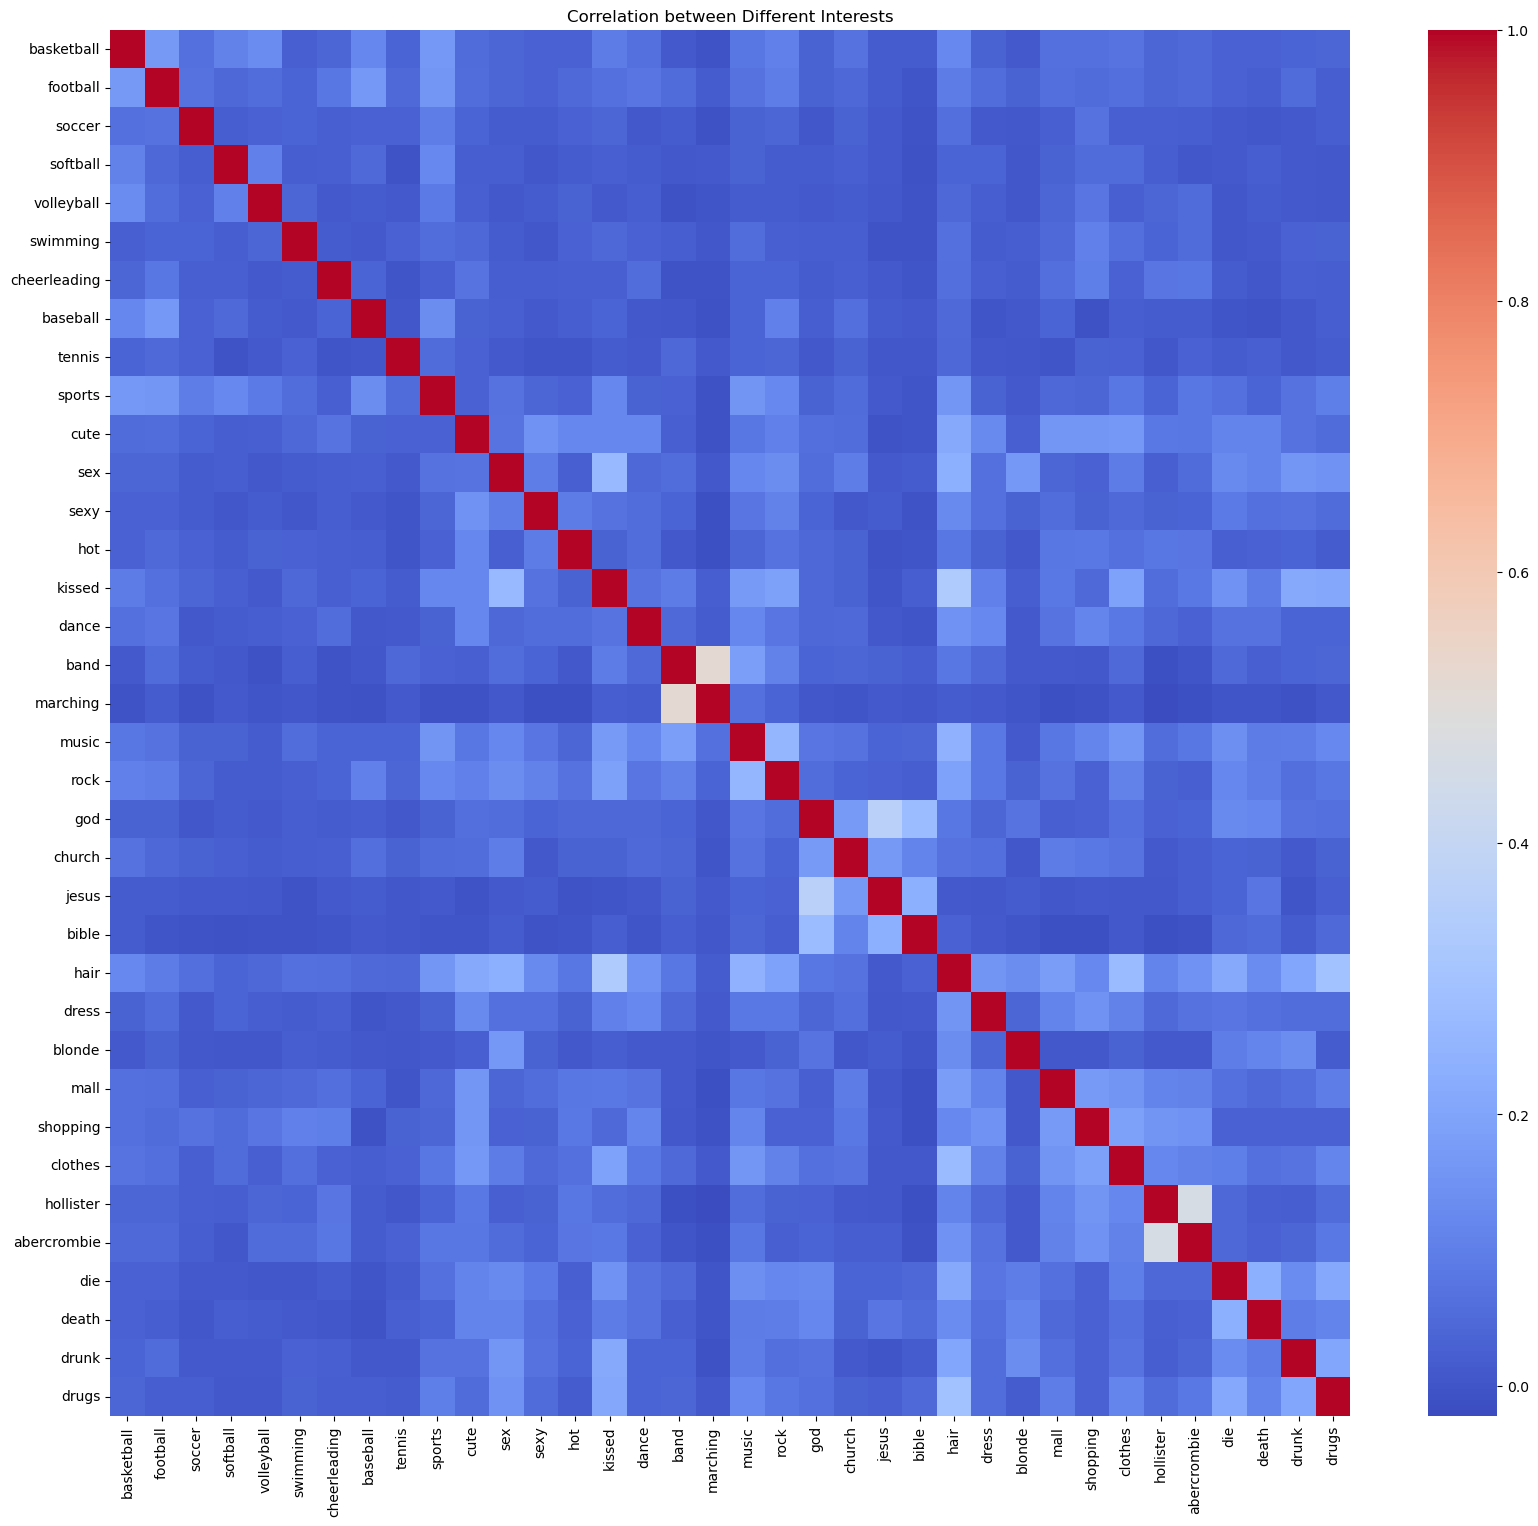

In [30]:
# Heatmap של קורלציה בין תחומי עניין

# נבחר רק עמודות של תחומי עניין
interest_cols = [
    'basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming',
    'cheerleading', 'baseball', 'tennis', 'sports',
    'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock',
    'god', 'church', 'jesus', 'bible',
    'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister', 'abercrombie',
    'die', 'death', 'drunk', 'drugs'
]

plt.figure(figsize=(20,18))
corr_matrix = df_clean[interest_cols].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation between Different Interests')
plt.show()


<Figure size 1000x600 with 0 Axes>

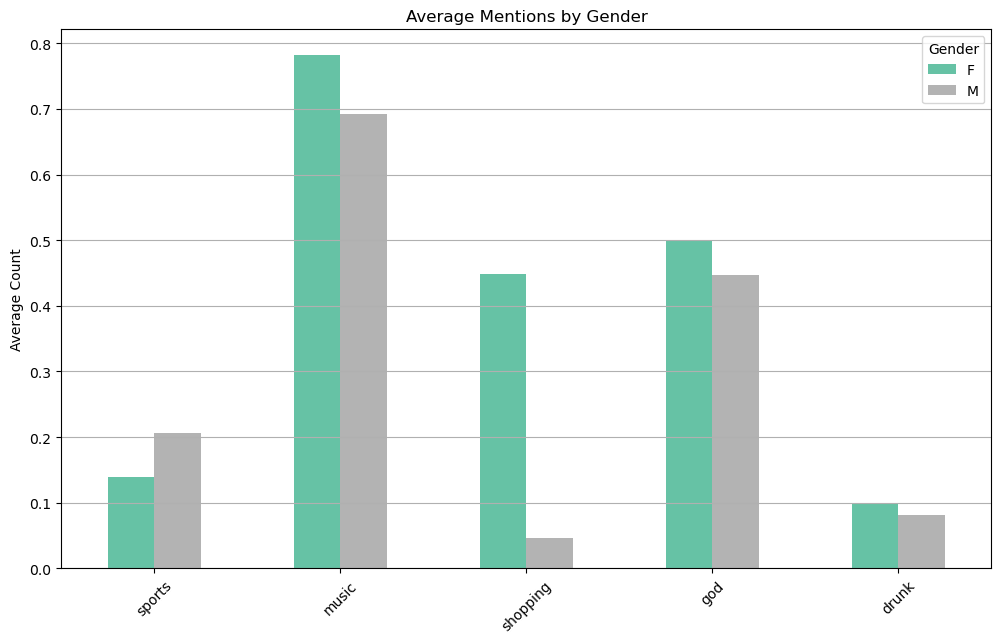

In [ ]:
# השוואות בין בנים ובנות בנושאים פופולריים

# נושאים עיקריים לבדיקה
topics = ['sports', 'music', 'shopping', 'god', 'drunk']

# נמסך את הדאטה לפי מגדר
gender_means = df_clean2.groupby('gender')[topics].mean().T

# נשרטט
plt.figure(figsize=(10,6))
gender_means.plot(kind='bar', figsize=(12,7), colormap='Set2')
plt.title('Average Mentions by Gender')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Gender')
plt.show()


C:\Users\amits\AppData\Local\Temp\ipykernel_29392\931884676.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean2['friends_group'] = pd.cut(df_clean2['NumberOffriends'],
C:\Users\amits\AppData\Local\Temp\ipykernel_29392\931884676.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  friends_means = df_clean2.groupby('friends_group')[['sports', 'music']].mean()


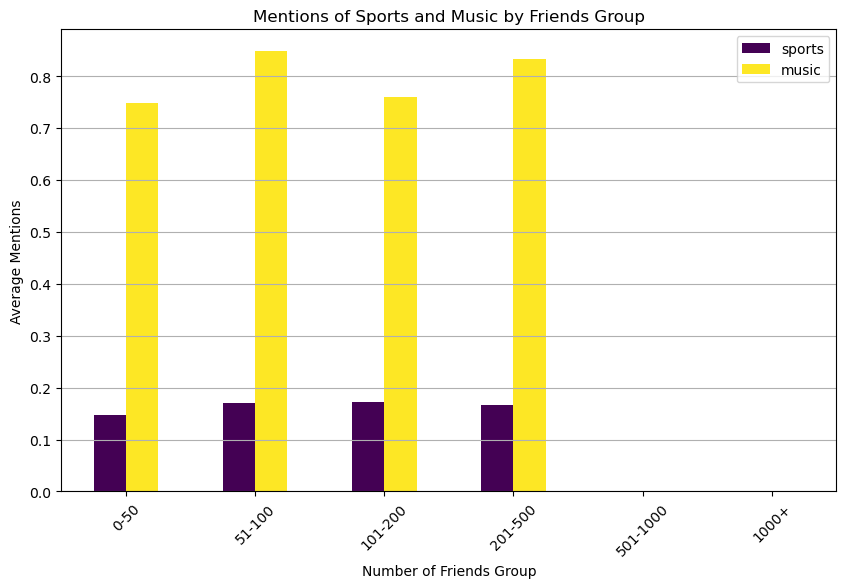

In [32]:
# פיצול לפי מספר חברים

# חלוקה לקבוצות לפי מספר חברים
df_clean2['friends_group'] = pd.cut(df_clean2['NumberOffriends'],
                                    bins=[-1, 50, 100, 200, 500, 1000, float('inf')],
                                    labels=['0-50', '51-100', '101-200', '201-500', '501-1000', '1000+'])

# ממוצעים לפי קבוצות חברים
friends_means = df_clean2.groupby('friends_group')[['sports', 'music']].mean()

# ציור
friends_means.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title('Mentions of Sports and Music by Friends Group')
plt.ylabel('Average Mentions')
plt.xlabel('Number of Friends Group')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [33]:
# קלאסטרינג (KMeans)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# תחומי עניין לביצוע קלאסטרינג
cluster_features = [
    'basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming',
    'cheerleading', 'baseball', 'tennis', 'sports', 'music', 'shopping', 'drunk', 'god'
]

# ננקה רשומות עם ערכים חסרים בתכונות האלו
df_cluster = df_clean2[cluster_features].dropna()

# נסטנדרט את הנתונים
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# נבחר מספר קלאסטרים - למשל 4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# נוסיף עמודת קלאסטר לדאטה
df_cluster['Cluster'] = kmeans.labels_

# ציור בפיצול ל-2 ממדים בהמשך


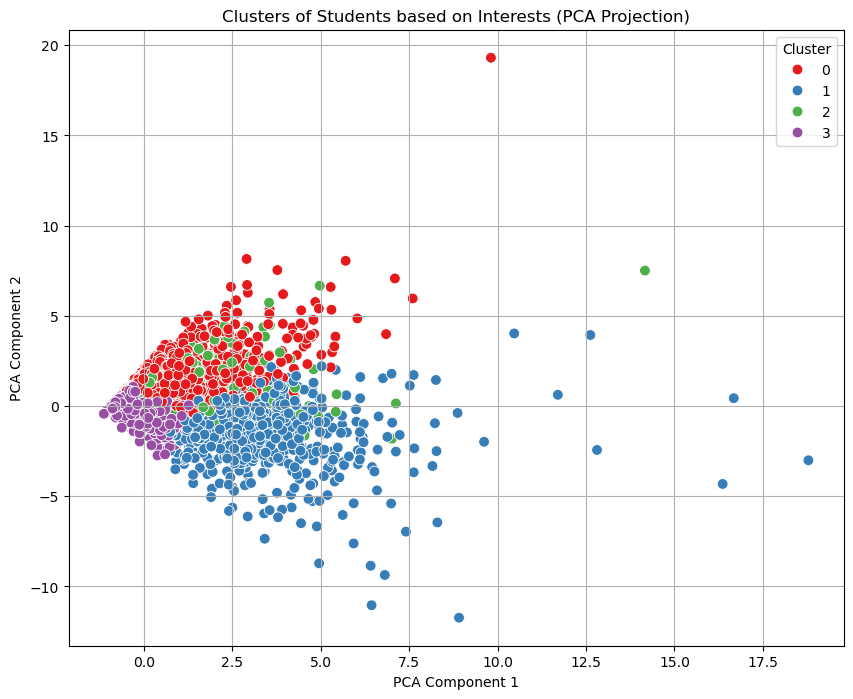

In [34]:
# הורדת מימדים עם PCA וציור קלאסטרים

from sklearn.decomposition import PCA

# נבצע PCA ל-2 רכיבים
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ציור
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_cluster['Cluster'], palette='Set1', s=60)
plt.title('Clusters of Students based on Interests (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()
